In [1]:
# !pip install spotipy

     |████████████████████████████████| 62 kB 3.5 MB/s  eta 0:00:01
     |████████████████████████████████| 138 kB 64.0 MB/s eta 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
  Attempting uninstall: requests
    Found existing installation: requests 2.11.1
    Uninstalling requests-2.11.1:
      Successfully uninstalled requests-2.11.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

two1 3.10.9 requires mnemonic==0.13, but you'll have mnemonic 0.18 which is incompatible.
two1 3.10.9 requires protobuf==3.0.0a3, but you'll have protobuf 3.6.1 which is incompatible.
two1 3.10.9 requires requests<=2.11.1, but you'll have requ

In [279]:
import numpy as np
import pandas as pd
import sys
import spotipy
import spotipy.util as util
import collections
%matplotlib notebook
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

# Data Imports from Spotify Web API

In [280]:
# configuring token

SPOTIPY_CLIENT_ID="70c49e55eae64f0a82b313830c6cebf3"
SPOTIPY_CLIENT_SECRET="cb5063c70a514acebca3481a37f15e01"
SPOTIPY_REDIRECT_URI = "http://localhost"
username='axw2001d'
scope="playlist-read-private"
token = util.prompt_for_user_token(username, 
                                   scope, 
                                   client_id=SPOTIPY_CLIENT_ID, 
                                   client_secret=SPOTIPY_CLIENT_SECRET, 
                                   redirect_uri=SPOTIPY_REDIRECT_URI
                                  )

In [281]:
def getUserPlaylists(username, token):
    if token: 
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlists(username)
        
        names = [playlist['name'] for playlist in results['items']]
        ids = [playlist['id'] for playlist in results['items']]
        return pd.DataFrame({'Playlist Name': names, 'Playlist ID': ids})
    
    else:
        return ("Can't get token")
    
albertPlaylists = getUserPlaylists(username, token)
albertPlaylists

,Playlist Name,Playlist ID
0,chill,0NZG7wQb2vYcZnDbXVhI0c
1,David + Albert,37i9dQZF1EJKaeFMaOl8eI
2,Meghan + Albert,37i9dQZF1EJLS65dwlarfG
3,Two Less Lonely People In the World,1YBSpcRT0vfkMxqQ0cxr99
4,headspace✨,3YYwXXquXYH1pKrC1gf29z
5,lofi hip hop music - beats to relax/study to,0vvXsWCC9xrXsKd4FyS8kM
6,Your Top Songs 2020,37i9dQZF1ELZnfvzQqAiOM
7,Songs I wanna learn,3uYQUUyYNeBgGY6Vz7Tydn
8,Blues Guitar Instrumentals,3a54WQYSUPwjgGmfd4JIII
9,for the fences,3PZOaNpq2B9vphKihSoW2D


In [282]:
def getPlaylistSongs(username, playlistID, token):
    
#     playlist = getUserPlaylists(username, token)
#     playlistID = list(playlist[playlist['Playlist Name'] == playlistName]['Playlist ID'])[0]

    features_list = ["artist", "album", "album_release_date", "album_cover_url", "track_name", "track_id", 
                         "explicit", "popularity", "danceability", "energy", "key", 
                         "loudness", "mode", "speechiness","instrumentalness","liveness",
                         "valence","tempo", "duration_ms","time_signature"]
    df = pd.DataFrame(columns = features_list[:7])
    
    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlist_tracks(username, playlistID, limit=70)
        tracks = results['items']
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
        
        for item in tracks:
            track = item['track']
            if track == None or track['id'] == None:
                continue
            features = {}
            
            # get metadata
            features['added_time'] = item['added_at']
            if len(track['album']['artists']) > 0:
                features['artist'] = track['album']['artists'][0]['name']
            else: 
                features['artist'] = None
            features['album_release_date'] = track['album']['release_date']
            features['album'] = track['album']['name']
            features['album_cover_url'] = track['album']['images'][0]['url']
            features['track_name'] = track['name']
            features['track_id'] = track['id']
            features['explicit'] = track['explicit']
            features['popularity'] = track['popularity']
            
            # concat dataframes
            track_df = pd.DataFrame(features, index=[0])
            df = pd.concat([df, track_df], ignore_index=True)
            
        track_ids = df['track_id']
        audio_features = []
        while len(track_ids) > 100:
            audio_features += sp.audio_features(','.join(track_ids[0:100]))
            track_ids = track_ids[100:]
        audio_features += sp.audio_features(','.join(track_ids))
        
        for feature in features_list[8:]:
            df[feature] = [track[feature] for track in audio_features]
        
        return df
    else:
        return ("Can't get token for", username)

In [283]:
# playlistSongs = getPlaylistSongs(username, "2NQemdvdAfjpxKymXLilBK", token)
playlistSongs = getPlaylistSongs(username, "0vvXsWCC9xrXsKd4FyS8kM", token)
playlistSongs

,artist,album,album_release_date,album_cover_url,track_name,track_id,explicit,added_time,popularity,danceability,...,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Amess,A place above heaven,2021-07-11,https://i.scdn.co/image/ab67616d0000b273be5dac...,Friday nights,72ipUmRhSVs9E4knzBRozk,False,2021-10-21T09:37:48Z,57.0,0.723,...,3,-14.098,1,0.1030,0.877,0.1200,0.0853,79.992,162000,4
1,DaniSogen,A World of Illusion,2021-10-21,https://i.scdn.co/image/ab67616d0000b273040998...,Pathfinder,7I7GgJ5WN4yL7y6A79nfh1,False,2021-10-21T09:37:48Z,52.0,0.397,...,2,-18.056,0,0.0490,0.545,0.3600,0.1790,118.951,168000,4
2,iamalex,Silk,2021-08-08,https://i.scdn.co/image/ab67616d0000b27322ad48...,Sunday Sleeping,3wJFDdh6KjENpemdkSU4Gg,False,2021-10-21T09:37:48Z,57.0,0.677,...,0,-14.147,1,0.0370,0.872,0.0813,0.0604,132.012,109091,4
3,Kurt Stewart,Pegan Hill,2021-04-28,https://i.scdn.co/image/ab67616d0000b273879c54...,Adrift,1SZnu0wclsSROTitZPP4Yf,False,2021-10-21T09:37:48Z,58.0,0.587,...,6,-22.150,0,0.0345,0.827,0.0999,0.2330,109.905,124174,4
4,Jhove,dream tapes,2021-07-19,https://i.scdn.co/image/ab67616d0000b273025a7e...,i don't wanna grow old,1CCg6gRdBE6HJ8MzwCV6HZ,False,2021-10-21T09:37:48Z,55.0,0.641,...,8,-15.486,1,0.0390,0.936,0.3830,0.0828,75.004,163242,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Dimension 32,Silent Emotions,2021-09-27,https://i.scdn.co/image/ab67616d0000b273d9b8ea...,Raining In My Head,2uv1gNThLENcJjbgDMSLYC,False,2021-10-21T09:37:48Z,58.0,0.597,...,5,-20.532,1,0.0349,0.946,0.0979,0.1300,120.028,128625,4
296,Team Astro,Travelers,2021-02-01,https://i.scdn.co/image/ab67616d0000b273e0b5c6...,Stop Calling Me Cute,4ycWuFxVYS1bWAqhBPEQvo,False,2021-10-21T09:37:48Z,47.0,0.712,...,11,-12.658,1,0.0416,0.951,0.0992,0.2060,80.022,158438,4
297,Kupla,Kingdom in Blue,2020-02-29,https://i.scdn.co/image/ab67616d0000b27365de43...,Sleepy Little One,26JfvzihGUTJs8vFEi4Nkn,False,2021-10-21T09:37:48Z,1.0,0.580,...,6,-11.073,0,0.0531,0.643,0.7070,0.1340,77.996,153846,4
298,Krynoze,A World After,2021-10-05,https://i.scdn.co/image/ab67616d0000b2737524cd...,Breaking Dawn,7oABvtgUnr0Oly5TjMG0NS,False,2021-10-21T09:37:48Z,57.0,0.592,...,8,-17.372,0,0.0374,0.924,0.3580,0.1820,139.983,156219,4


# TSNE

In [286]:
def cleanData(df):
    
    # getting only month of release date and added time
    df = df.drop_duplicates()
    df['album_release_date'] = df['album_release_date'].str.slice(0, 4)
    df['added_time'] = df['added_time'].str.slice(0, 4)
    
    # setting index and dropping irrelevant columns
    df.index = df['track_id']
    df = df[~df.index.duplicated(keep='first')]

    ohe = df.drop(['artist', 'album', 'track_name', 'track_id', 'album_cover_url'], axis=1)
    
    # add a few columns as categorical features
    ohe['key'] = ohe['key'].astype(str)
    ohe['mode'] = ohe['mode'].astype(str)
    ohe['time_signature'] = ohe['time_signature'].astype(str)
    ohe['popularity'] = ohe['popularity'].astype(int)
        
    # getting dummies
    ohe = pd.get_dummies(ohe)
        
    # normalization
    columns_to_normalize = ['popularity', 'danceability', 'energy', 
                                'loudness', 'speechiness', 'instrumentalness', 
                                'liveness', 'valence', 'tempo', 'duration_ms']
    
    # store mean and std of features before normalization, for restoration later
    metadata = {}
    
    weighted_cols = ['popularity', 'danceability', 'energy', 'instrumentalness']
    for column in columns_to_normalize:
        scale = 1
        if column in weighted_cols:
            scale = .2
        metadata[column] = (ohe[column].mean(), scale * ohe[column].std())
        ohe[column] = (ohe[column] - ohe[column].mean()) / ohe[column].std()
    
    ohe['artist'] = df['artist']
    ohe['album'] = df['album']
    ohe['track_name'] = df['track_name']
    
#     weighted_cols = ['popularity', 'danceability', 'energy', 'instrumentalness']
    for col in weighted_cols:
        ohe[col] = 5 * ohe[col]
    
    ohe['album_cover_url'] = df['album_cover_url']
    
    return ohe, metadata

def generate_TSNE(df: pd.DataFrame()):
    normed_df, metadata = cleanData(df)
    
    # np.random.seed(42)
    time_start = time.time()
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(normed_df[normed_df.columns.difference(['artist', 'album', 'track_name', 'album_cover_url'])])
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    normed_df['tsne-one'] = tsne_results[:,0] / np.sqrt(tsne_results[:,0].std())
    normed_df['tsne-two'] = tsne_results[:,1] / np.sqrt(tsne_results[:,1].std())
    normed_df['tsne-three'] = tsne_results[:,2] / np.sqrt(tsne_results[:,2].std())
    
    for column in list(metadata.keys()):
        normed_df[column] = normed_df[column]*metadata[column][1] + metadata[column][0]

    # normed_df['tsne-one'] = [np.log(x) if x > 0 else -np.log(-x) for x in tsne_results[:,0]]
    # normed_df['tsne-two'] = [np.log(y) if y > 0 else -np.log(-y) for y in tsne_results[:,1]]
    # normed_df['tsne-three'] = [np.log(z) if z > 0 else -np.log(-z) for z in tsne_results[:,2]]
    
    return normed_df

In [287]:
test = generate_TSNE(playlistSongs)
test

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.130844
[t-SNE] KL divergence after 250 iterations with early exaggeration: 121.976105
[t-SNE] KL divergence after 300 iterations: 3.006198
t-SNE done! Time elapsed: 0.3828420639038086 seconds


,popularity,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,...,time_signature_3,time_signature_4,time_signature_5,artist,album,track_name,album_cover_url,tsne-one,tsne-two,tsne-three
track_id,,,,,,,,,,,,,,,,,,,,,
72ipUmRhSVs9E4knzBRozk,57.0,0.723,0.2520,-14.098,0.1030,0.877,0.1200,0.0853,79.992,162000.0,...,0,1,0,Amess,A place above heaven,Friday nights,https://i.scdn.co/image/ab67616d0000b273be5dac...,-0.043418,2.121269,3.280970
7I7GgJ5WN4yL7y6A79nfh1,52.0,0.397,0.2020,-18.056,0.0490,0.545,0.3600,0.1790,118.951,168000.0,...,0,1,0,DaniSogen,A World of Illusion,Pathfinder,https://i.scdn.co/image/ab67616d0000b273040998...,-1.813100,-4.225717,0.844447
3wJFDdh6KjENpemdkSU4Gg,57.0,0.677,0.2280,-14.147,0.0370,0.872,0.0813,0.0604,132.012,109091.0,...,0,1,0,iamalex,Silk,Sunday Sleeping,https://i.scdn.co/image/ab67616d0000b27322ad48...,-3.534263,4.010233,0.441516
1SZnu0wclsSROTitZPP4Yf,58.0,0.587,0.0548,-22.150,0.0345,0.827,0.0999,0.2330,109.905,124174.0,...,0,1,0,Kurt Stewart,Pegan Hill,Adrift,https://i.scdn.co/image/ab67616d0000b273879c54...,2.034005,1.854036,-4.850742
1CCg6gRdBE6HJ8MzwCV6HZ,55.0,0.641,0.2260,-15.486,0.0390,0.936,0.3830,0.0828,75.004,163242.0,...,0,1,0,Jhove,dream tapes,i don't wanna grow old,https://i.scdn.co/image/ab67616d0000b273025a7e...,-0.565962,2.673201,-0.038471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2uv1gNThLENcJjbgDMSLYC,58.0,0.597,0.1580,-20.532,0.0349,0.946,0.0979,0.1300,120.028,128625.0,...,0,1,0,Dimension 32,Silent Emotions,Raining In My Head,https://i.scdn.co/image/ab67616d0000b273d9b8ea...,-16.392229,0.201830,4.835209
4ycWuFxVYS1bWAqhBPEQvo,47.0,0.712,0.1730,-12.658,0.0416,0.951,0.0992,0.2060,80.022,158438.0,...,0,1,0,Team Astro,Travelers,Stop Calling Me Cute,https://i.scdn.co/image/ab67616d0000b273e0b5c6...,0.897798,3.272197,1.251686
26JfvzihGUTJs8vFEi4Nkn,1.0,0.580,0.4390,-11.073,0.0531,0.643,0.7070,0.1340,77.996,153846.0,...,0,1,0,Kupla,Kingdom in Blue,Sleepy Little One,https://i.scdn.co/image/ab67616d0000b27365de43...,-1.246161,0.497847,1.619960


<IPython.core.display.Javascript object>


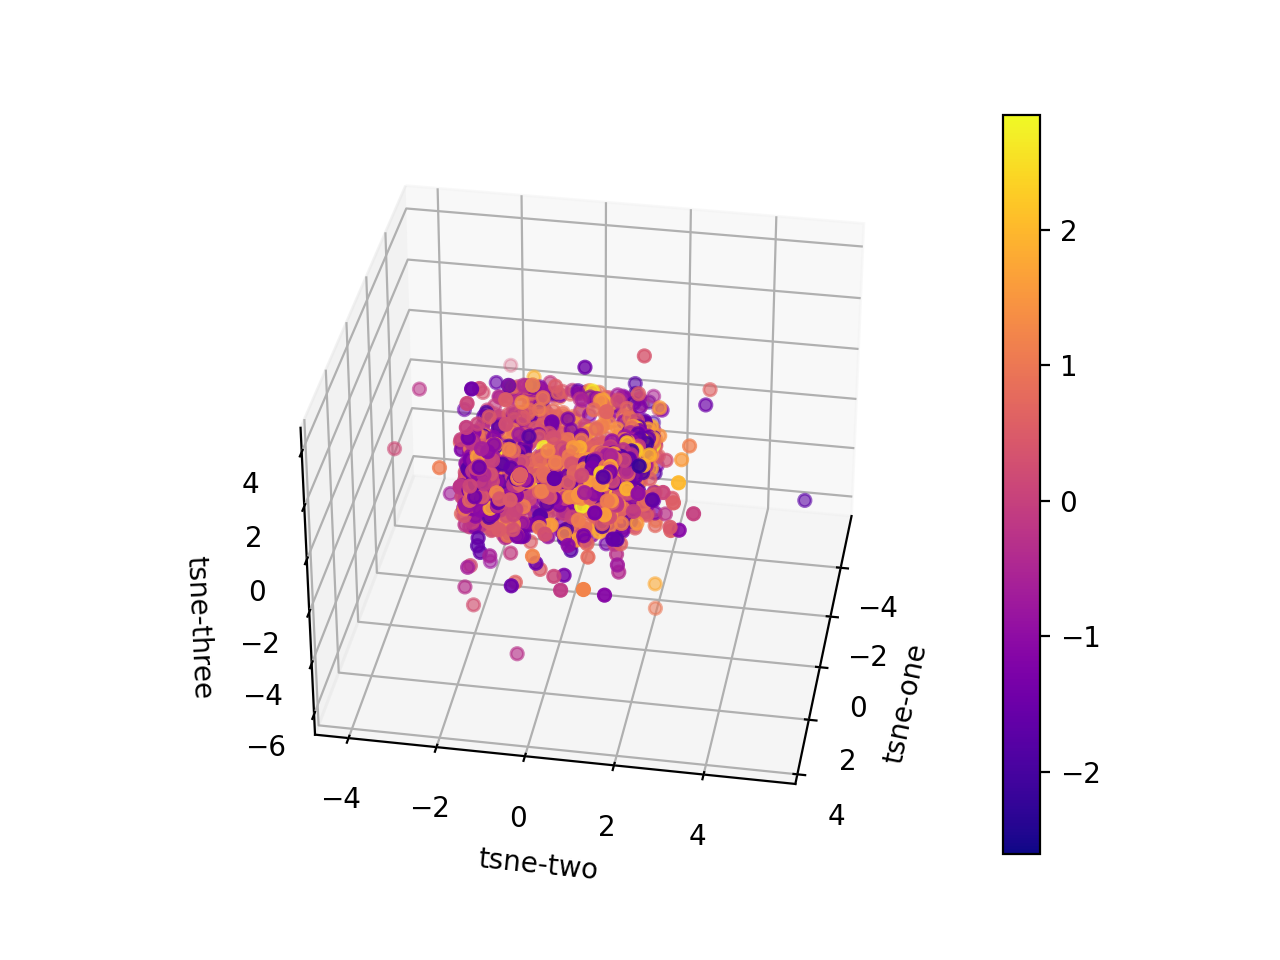

In [273]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.scatter(
    xs=test["tsne-one"], 
    ys=test["tsne-two"], 
    zs=test["tsne-three"], 
    c=test['tempo'],
    cmap='plasma')

ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
fig.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


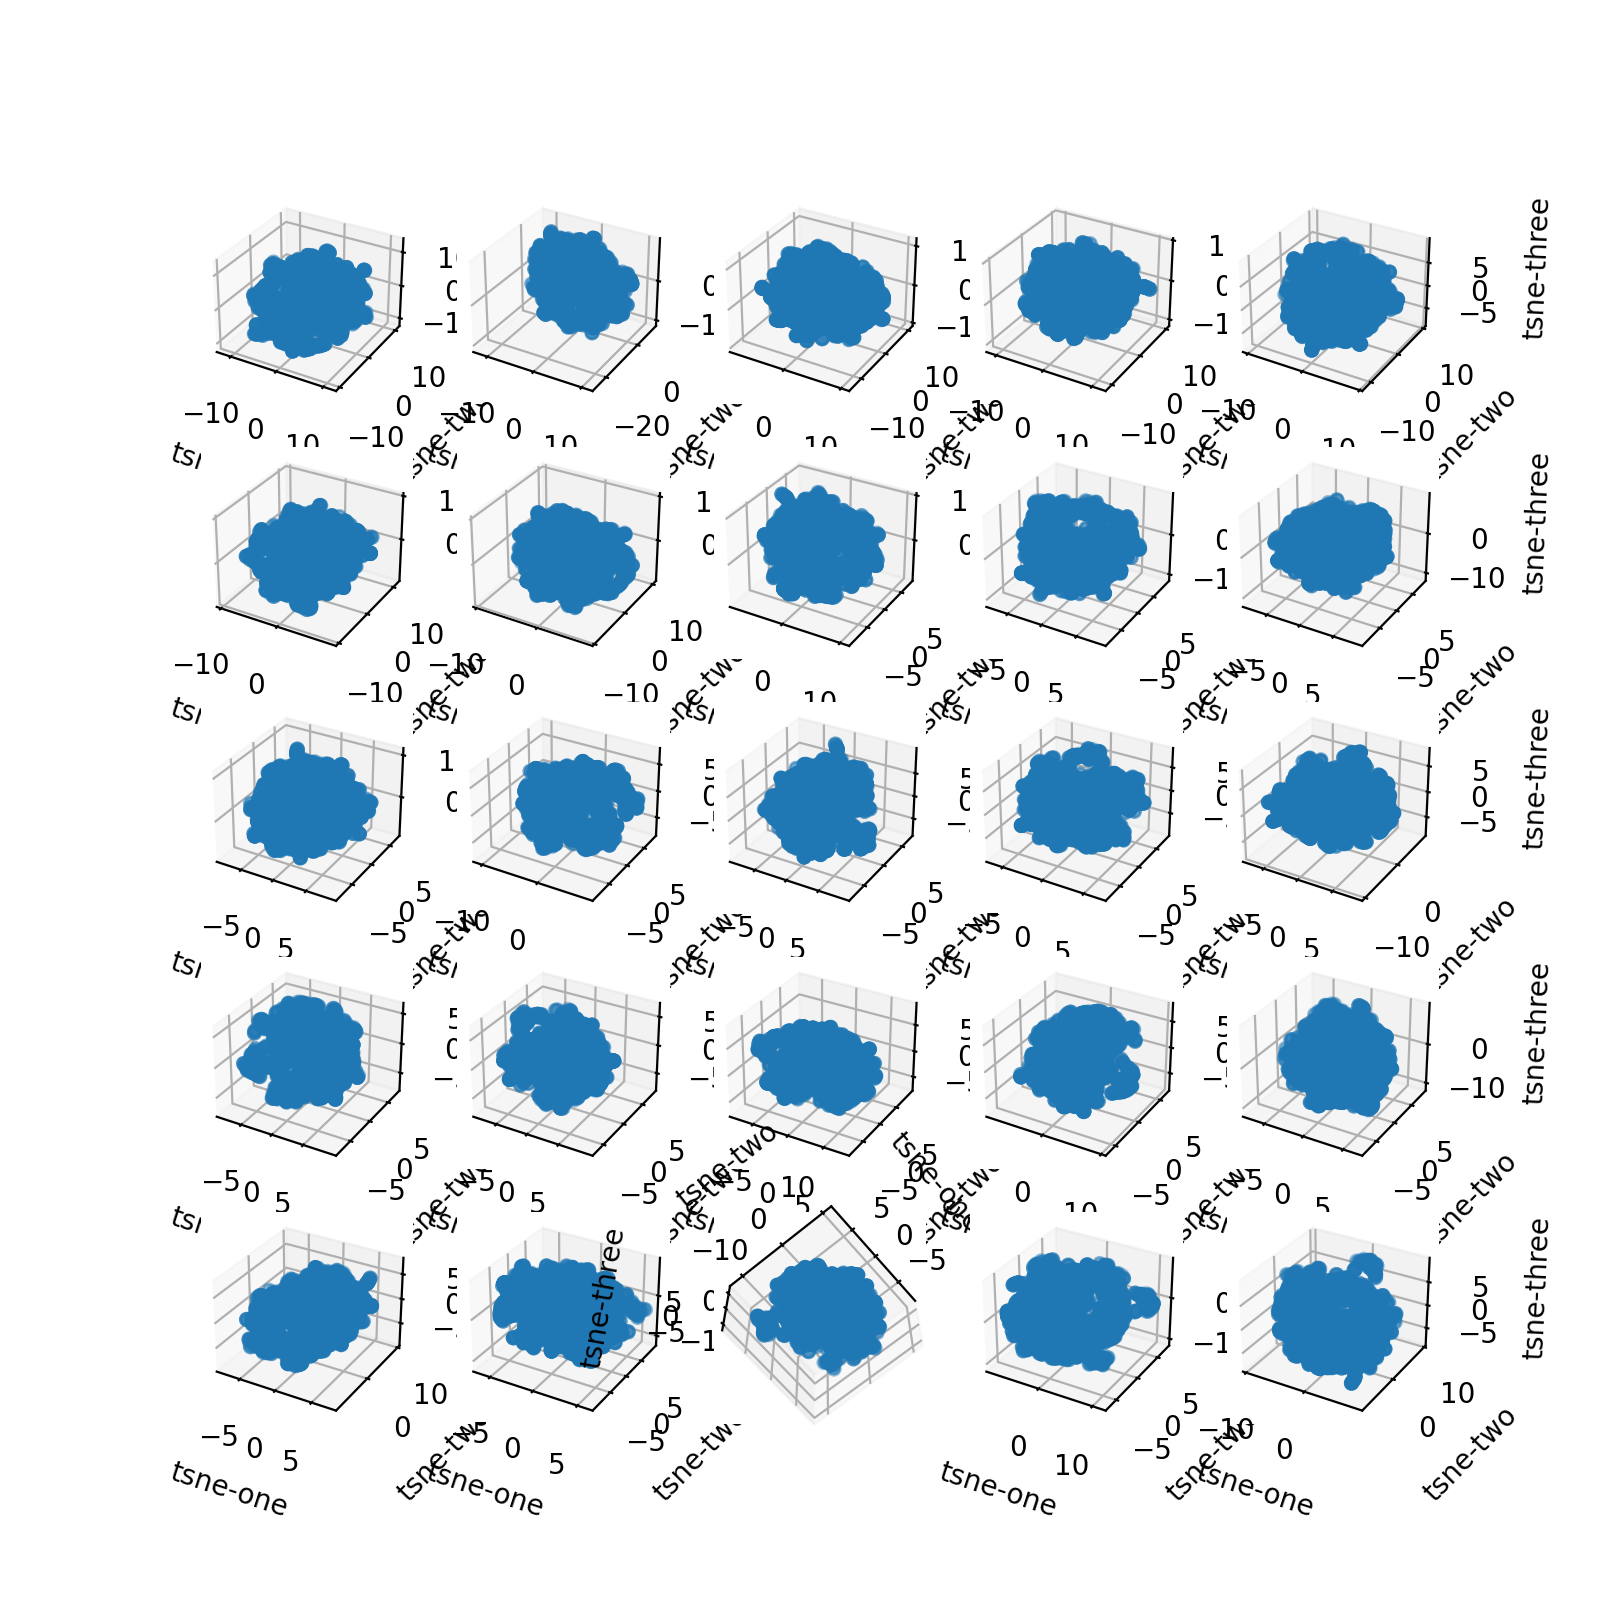

In [123]:
# fig, ax = plt.subplots(5, 5)
fig, axs = plt.subplots(5,5,figsize=(8,8), subplot_kw=dict(projection='3d'))

increment = (90 - 20) / 25
perp = 20
for i, ax in enumerate(axs.flat):
    tsne = TSNE(n_components=3, perplexity=perp, n_iter=300)
    tsne_results = tsne.fit_transform(largeData)
    t1 = tsne_results[:,0]
    t2 = tsne_results[:,1]
    t3 = tsne_results[:,2]
    ax.scatter(xs = t1, ys = t2, zs = t3, cmap='tab10')
    ax.set_xlabel('tsne-one')
    ax.set_ylabel('tsne-two')
    ax.set_zlabel('tsne-three')
    perp += increment

plt.show()

# Testing Stuff

In [289]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import spotipy
import spotipy.util as util
import time


def tsne_spotify(token, username, playlistID):
    # dataframe of the songs in playlistID
	playlistSongs = getPlaylistSongs(username, playlistID, token)

    # adds three columns to prev df, with TSNE coords
	data = generate_TSNE(playlistSongs) 

	return data[['artist', 'album', 'track_name', 'album_cover_url', 
                    'danceability', 'popularity', 'energy', 'loudness', 'duration_ms',
                    'speechiness', 'instrumentalness', 'liveness', 'tempo', 
                    'tsne-one', 'tsne-two', 'tsne-three']].to_json(orient='index')

# get the playlists for the username and token; not needed for current implementation
def getUserPlaylists(username, token):
    if token: 
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlists(username)
        
        names = [playlist['name'] for playlist in results['items']]
        ids = [playlist['id'] for playlist in results['items']]
        return pd.DataFrame({'Playlist Name': names, 'Playlist ID': ids})
    
    else:
        return ("Can't get token")
    

def getPlaylistSongs(username, playlistID, token):
    
    # playlist = getUserPlaylists(username, token)
    # playlistID = list(playlist[playlist['Playlist Name'] == playlistName]['Playlist ID'])[0]

    features_list = ["artist", "album", "album_release_date", "album_cover_url", "track_name", "track_id", 
                         "explicit", "popularity", "danceability", "energy", "key", 
                         "loudness", "mode", "speechiness","instrumentalness","liveness",
                         "valence","tempo", "duration_ms","time_signature"]
    df = pd.DataFrame(columns = features_list[:7])
    
    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlist_tracks(username, playlistID, limit=70)
        tracks = results['items']
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
        
        for item in tracks:
            track = item['track']
            if track == None or track['id'] == None:
                continue
            features = {}
            
            # get metadata
            features['added_time'] = item['added_at']
            if len(track['album']['artists']) > 0:
                features['artist'] = track['album']['artists'][0]['name']
            else: 
                features['artist'] = None
            features['album_release_date'] = track['album']['release_date']
            features['album'] = track['album']['name']
            features['album_cover_url'] = track['album']['images'][0]['url']
            features['track_name'] = track['name']
            features['track_id'] = track['id']
            features['explicit'] = track['explicit']
            features['popularity'] = track['popularity']
            
            # concat dataframes
            track_df = pd.DataFrame(features, index=[0])
            df = pd.concat([df, track_df], ignore_index=True)
            
        track_ids = df['track_id']
        audio_features = []
        while len(track_ids) > 100:
            audio_features += sp.audio_features(','.join(track_ids[0:100]))
            track_ids = track_ids[100:]
        audio_features += sp.audio_features(','.join(track_ids))
        
        for feature in features_list[8:]:
            df[feature] = [track[feature] for track in audio_features]
        
        return df
    else:
        return ("Can't get token for", username)


def cleanData(df):
    
    # getting only month of release date and added time
    df = df.drop_duplicates()
    df['album_release_date'] = df['album_release_date'].str.slice(0, 4)
    df['added_time'] = df['added_time'].str.slice(0, 4)
    
    # setting index and dropping irrelevant columns
    df.index = df['track_id']
    df = df[~df.index.duplicated(keep='first')]

    ohe = df.drop(['artist', 'album', 'track_name', 'track_id', 'album_cover_url'], axis=1)
    
    # add a few columns as categorical features
    ohe['key'] = ohe['key'].astype(str)
    ohe['mode'] = ohe['mode'].astype(str)
    ohe['time_signature'] = ohe['time_signature'].astype(str)
    ohe['popularity'] = ohe['popularity'].astype(int)
        
    # getting dummies
    ohe = pd.get_dummies(ohe)
        
    # normalization
    columns_to_normalize = ['popularity', 'danceability', 'energy', 
                                'loudness', 'speechiness', 'instrumentalness', 
                                'liveness', 'valence', 'tempo', 'duration_ms']
    
    # store mean and std of features before normalization, for restoration later
    metadata = {}
    
    weighted_cols = ['popularity', 'danceability', 'energy', 'instrumentalness']
    for column in columns_to_normalize:
        scale = 1
        if column in weighted_cols:
            scale = .2
        metadata[column] = (ohe[column].mean(), scale * ohe[column].std())
        ohe[column] = (ohe[column] - ohe[column].mean()) / ohe[column].std()
    
    ohe['artist'] = df['artist']
    ohe['album'] = df['album']
    ohe['track_name'] = df['track_name']
    
#     weighted_cols = ['popularity', 'danceability', 'energy', 'instrumentalness']
    for col in weighted_cols:
        ohe[col] = 5 * ohe[col]
    
    ohe['album_cover_url'] = df['album_cover_url']
    
    return ohe, metadata

def generate_TSNE(df: pd.DataFrame()):
    normed_df, metadata = cleanData(df)
    
    # np.random.seed(42)
    time_start = time.time()
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(normed_df[normed_df.columns.difference(['artist', 'album', 'track_name', 'album_cover_url'])])
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    normed_df['tsne-one'] = tsne_results[:,0] / np.sqrt(tsne_results[:,0].std())
    normed_df['tsne-two'] = tsne_results[:,1] / np.sqrt(tsne_results[:,1].std())
    normed_df['tsne-three'] = tsne_results[:,2] / np.sqrt(tsne_results[:,2].std())
    
    for column in list(metadata.keys()):
        normed_df[column] = normed_df[column]*metadata[column][1] + metadata[column][0]

    # normed_df['tsne-one'] = [np.log(x) if x > 0 else -np.log(-x) for x in tsne_results[:,0]]
    # normed_df['tsne-two'] = [np.log(y) if y > 0 else -np.log(-y) for y in tsne_results[:,1]]
    # normed_df['tsne-three'] = [np.log(z) if z > 0 else -np.log(-z) for z in tsne_results[:,2]]
    
    return normed_df

playlistID = '2NQemdvdAfjpxKymXLilBK'
test = tsne_spotify(token, username, playlistID)
test

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1483 samples in 0.003s...
[t-SNE] Computed neighbors for 1483 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1483
[t-SNE] Computed conditional probabilities for sample 1483 / 1483
[t-SNE] Mean sigma: 2.147765
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.777763
[t-SNE] KL divergence after 300 iterations: 0.969405
t-SNE done! Time elapsed: 2.1657474040985107 seconds


'{"3UMpcCyG1Dj0yDb377vu2K":{"artist":"HoodRich Pablo Juan","album":"Zambamafoo","track_name":"Zambamafoo","album_cover_url":"https:\\/\\/i.scdn.co\\/image\\/ab67616d0000b27319388d33688504565f79aa02","danceability":0.886,"popularity":46.0,"energy":0.644,"loudness":-9.284,"duration_ms":173493.0,"speechiness":0.284,"instrumentalness":0.0,"liveness":0.161,"tempo":119.992,"tsne-one":-0.9549389482,"tsne-two":-2.2938411236,"tsne-three":1.4043984413},"3x4KIuoye6F12loCFckCX3":{"artist":"Various Artists","album":"DJ Worldtour","track_name":"That\'s My Rule (Intro) [feat. Lil Uzi Vert]","album_cover_url":"https:\\/\\/i.scdn.co\\/image\\/ab67616d0000b273005ac5b156cf09c76d9664ca","danceability":0.908,"popularity":0.0,"energy":0.695,"loudness":-7.1,"duration_ms":166792.0,"speechiness":0.269,"instrumentalness":0.0,"liveness":0.27,"tempo":144.026,"tsne-one":-2.5338602066,"tsne-two":-3.3803877831,"tsne-three":-0.7664664984},"70NxaxjB8IjX4YxXbT90iX":{"artist":"Trippie Redd","album":"A Love Letter To You

In [290]:
test = pd.read_json(test)
test

,3UMpcCyG1Dj0yDb377vu2K,3x4KIuoye6F12loCFckCX3,70NxaxjB8IjX4YxXbT90iX,3tcoEYOZUHKB3RKNByIN13,3QybPutx0Tjk472bBKjNWn,2bSk87AVkCIIC3Bcligq1z,5PTG6rrL6EPFD9E2QMI2pl,5lf3ajySox32qFvGEf2TFM,27a1mYSG5tYg7dmEjWBcmL,2xLMifQCjDGFmkHkpNLD9h,...,4s7QLoImIwmPi9L6dq1nVW,7F9cT6hIRhnFCYP6GKS0tf,6pmNoWKk0r6zfIjWneJRxR,1Is8hGpkGMiePASAxBluxM,0e8nrvls4Qqv5Rfa2UhqmO,5bBzkJE9BqYTL27webAUCw,34D6FJysnQioVingDKufuf,4yNoUQkYf1QF8iYlEzNynH,5JrljwNvTFN6y7b5a5Nzq7,6oFJuAS9OYFfMRFJ08SI1S
artist,HoodRich Pablo Juan,Various Artists,Trippie Redd,Lil Uzi Vert,Sheck Wes,Lil Baby,Famous Dex,Lil Baby,Travis Scott,Travis Scott,...,Drake,Drake,DaBaby,Baby Keem,Lil Nas X,Remble,Drake,Nardo Wick,The Kid LAROI,The Kid LAROI
album,Zambamafoo,DJ Worldtour,A Love Letter To You 2,Luv Is Rage 2,Mo Bamba,Harder Than Ever,Dex Meets Dexter,Harder Than Ever,ASTROWORLD,ASTROWORLD,...,Certified Lover Boy,Certified Lover Boy,Lonely (with Lil Wayne),The Melodic Blue,MONTERO,Rocc Climbing (feat. Lil Yachty),Certified Lover Boy,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",F*CK LOVE 3+: OVER YOU,F*CK LOVE 3+: OVER YOU
track_name,Zambamafoo,That's My Rule (Intro) [feat. Lil Uzi Vert],Woah Woah Woah,For Real,Mo Bamba,Life Goes On,JAPAN,Southside,CAN'T SAY,SICKO MODE,...,TSU,IMY2 (with Kid Cudi),Lonely (with Lil Wayne),16,THATS WHAT I WANT,Rocc Climbing (feat. Lil Yachty),N 2 Deep,"Who Want Smoke?? (feat. G Herbo, Lil Durk & 21...",ATTENTION,BAD NEWS
album_cover_url,https://i.scdn.co/image/ab67616d0000b27319388d...,https://i.scdn.co/image/ab67616d0000b273005ac5...,https://i.scdn.co/image/ab67616d0000b273e991f3...,https://i.scdn.co/image/ab67616d0000b27341b41e...,https://i.scdn.co/image/ab67616d0000b273a7d96c...,https://i.scdn.co/image/ab67616d0000b2736cab41...,https://i.scdn.co/image/ab67616d0000b27324ef74...,https://i.scdn.co/image/ab67616d0000b2736cab41...,https://i.scdn.co/image/ab67616d0000b273072e9f...,https://i.scdn.co/image/ab67616d0000b273072e9f...,...,https://i.scdn.co/image/ab67616d0000b273cd945b...,https://i.scdn.co/image/ab67616d0000b273cd945b...,https://i.scdn.co/image/ab67616d0000b27322ff72...,https://i.scdn.co/image/ab67616d0000b2731bfa23...,https://i.scdn.co/image/ab67616d0000b273be8267...,https://i.scdn.co/image/ab67616d0000b273efb947...,https://i.scdn.co/image/ab67616d0000b273cd945b...,https://i.scdn.co/image/ab67616d0000b273f26d2f...,https://i.scdn.co/image/ab67616d0000b273b4d59e...,https://i.scdn.co/image/ab67616d0000b273b4d59e...
danceability,0.886,0.908,0.617,0.902,0.738,0.716,0.733,0.813,0.702,0.834,...,0.568,0.59,0.718,0.701,0.737,0.832,0.507,0.739,0.878,0.55
popularity,46,0,48,58,0,74,72,61,77,84,...,83,81,81,75,95,69,82,81,64,60
energy,0.644,0.695,0.773,0.673,0.629,0.541,0.678,0.646,0.708,0.73,...,0.56,0.493,0.628,0.782,0.846,0.656,0.429,0.74,0.583,0.533
loudness,-9.284,-7.1,-4.793,-7.481,-4.882,-7.909,-7.771,-4.901,-5.366,-3.714,...,-9.059,-8.704,-5.334,-4.987,-4.51,-7.492,-7.726,-5.86,-7.053,-6.853
duration_ms,173493,166792,222288,177048,180898,247055,142000,173437,198408,312820,...,308756,252379,154433,156040,143901,175878,273578,279853,104525,131365
speechiness,0.284,0.269,0.0397,0.458,0.0495,0.149,0.438,0.263,0.0547,0.222,...,0.42,0.0367,0.373,0.138,0.22,0.375,0.326,0.333,0.0729,0.0441


In [291]:
test.to_json('tsneLargeDataset.json')
test.iloc[:, 0:50].to_json('tsneToyDataset.json')
test.iloc[:, 0:100].to_json('tsne100Dataset.json')
test.iloc[:, 0:400].to_json('tsne400Dataset.json')
test.iloc[:, 0:800].to_json('tsne800Dataset.json')

In [292]:
with open('tsneToyDataset.json') as json_file:
    data = json.load(json_file)
len(data)
# pd.read_json('tsneToyDataset')

50